In [29]:
import warnings
warnings.filterwarnings('ignore')

import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geopandas import GeoDataFrame
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import seaborn as sns
from tqdm import tqdm
from pyproj import Geod
geod = Geod(ellps="WGS84")


from shapely import wkt
from tqdm.notebook import tqdm
tqdm.pandas()

from matplotlib import rc, rcParams
rc('font', weight='bold')

In [30]:
import copy
from matplotlib import rc, rcParams
rc('font', weight='bold')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

In [31]:
df = pd.read_csv('Houston_Tropomi_csv.csv')
df = df[(df.QA_Value > 75) & (df.ColumnAmountNO2Trop > -0.5e15)].reset_index(drop = True)
df = df[['ColumnAmountNO2Trop', 'Date']]
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [33]:
df.groupby('Year')['ColumnAmountNO2Trop'].mean()

Year
2018    3.957239e+15
2019    4.659545e+15
2020    3.960621e+15
2021    4.565030e+15
Name: ColumnAmountNO2Trop, dtype: float64

In [6]:
df.Date = pd.to_datetime(df.Date)
df['Date1'] = df.Date.apply(lambda x : x.to_period(freq="M")) 
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df[df['Year'] != 2018].reset_index(drop = True)

In [7]:
Mothly_Xlabels = pd.read_csv('Monthly_xLabels_Boxplot.csv')['Month'].dropna().reset_index(drop = True)

In [8]:
df['pollutant'] = 'EPA'

# Tropomi

In [10]:
# No2 for houston

df_no2 = pd.read_csv(r"E:\Data\Texas 6 pollutants (2012-2022) Hourly data\Extracted data\Texas_NitrogenOxide_2012_2022.csv")
df_no2['Date_Local'] = pd.to_datetime(df_no2['Date_Local'])
df_no2['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
df_no2 = df_no2[df_no2.City == 'Houston'].reset_index(drop = True)
df_no2 = df_no2[df_no2.Date_Local.between('2019-01-01', '2021-12-31')].reset_index(drop = True)
df_no2['Date1'] = df_no2.Date_Local.apply(lambda x : x.to_period(freq="M")) 

In [11]:
df_no2

,Unnamed: 0,Date_Local,Time_Local,City,Site_Num,No2,Units of Measure,Date1
0,1757923,2019-01-01,00:00,Houston,1004_Brazoria_Houston,6.9,Parts per billion,2019-01
1,1757924,2019-01-01,01:00,Houston,1004_Brazoria_Houston,5.1,Parts per billion,2019-01
2,1757925,2019-01-01,02:00,Houston,1004_Brazoria_Houston,4.4,Parts per billion,2019-01
3,1757926,2019-01-01,03:00,Houston,1004_Brazoria_Houston,6.6,Parts per billion,2019-01
4,1757927,2019-01-01,04:00,Houston,1004_Brazoria_Houston,9.3,Parts per billion,2019-01
...,...,...,...,...,...,...,...,...
365563,2477083,2021-12-31,19:00,Houston,1066_Harris_Houston,5.1,Parts per billion,2021-12
365564,2477084,2021-12-31,20:00,Houston,1066_Harris_Houston,4.8,Parts per billion,2021-12
365565,2477085,2021-12-31,21:00,Houston,1066_Harris_Houston,4.7,Parts per billion,2021-12
365566,2477086,2021-12-31,22:00,Houston,1066_Harris_Houston,3.3,Parts per billion,2021-12


In [12]:
df_trop_stats = df.groupby('Date1').agg({'ColumnAmountNO2Trop': ['mean', 'median', 'std', 'max', 'min', ]}).reset_index().head()
cols = list(df_trop_stats.columns.get_level_values(1))

cols[0] = 'Date'
cols[1] = 'City'

In [14]:
df_trop_stats

Date1 ColumnAmountNO2Trop                                            \
                          mean        median           std           max   
0  2019-01        5.114699e+15  4.084666e+15  4.002583e+15  2.904547e+16   
1  2019-02        5.346544e+15  4.626449e+15  3.471561e+15  2.058056e+16   
2  2019-03        7.073257e+15  5.653613e+15  4.730906e+15  2.824471e+16   
3  2019-04        3.087631e+15  2.736027e+15  1.510842e+15  9.112815e+15   
4  2019-05        2.853852e+15  2.399945e+15  1.964483e+15  1.192008e+16   

                 
            min  
0  3.608156e+14  
1  3.592548e+14  
2  1.073521e+15  
3 -2.615738e+14  
4 -2.907286e+14

CPU times: total: 11.7 s
Wall time: 11.8 s


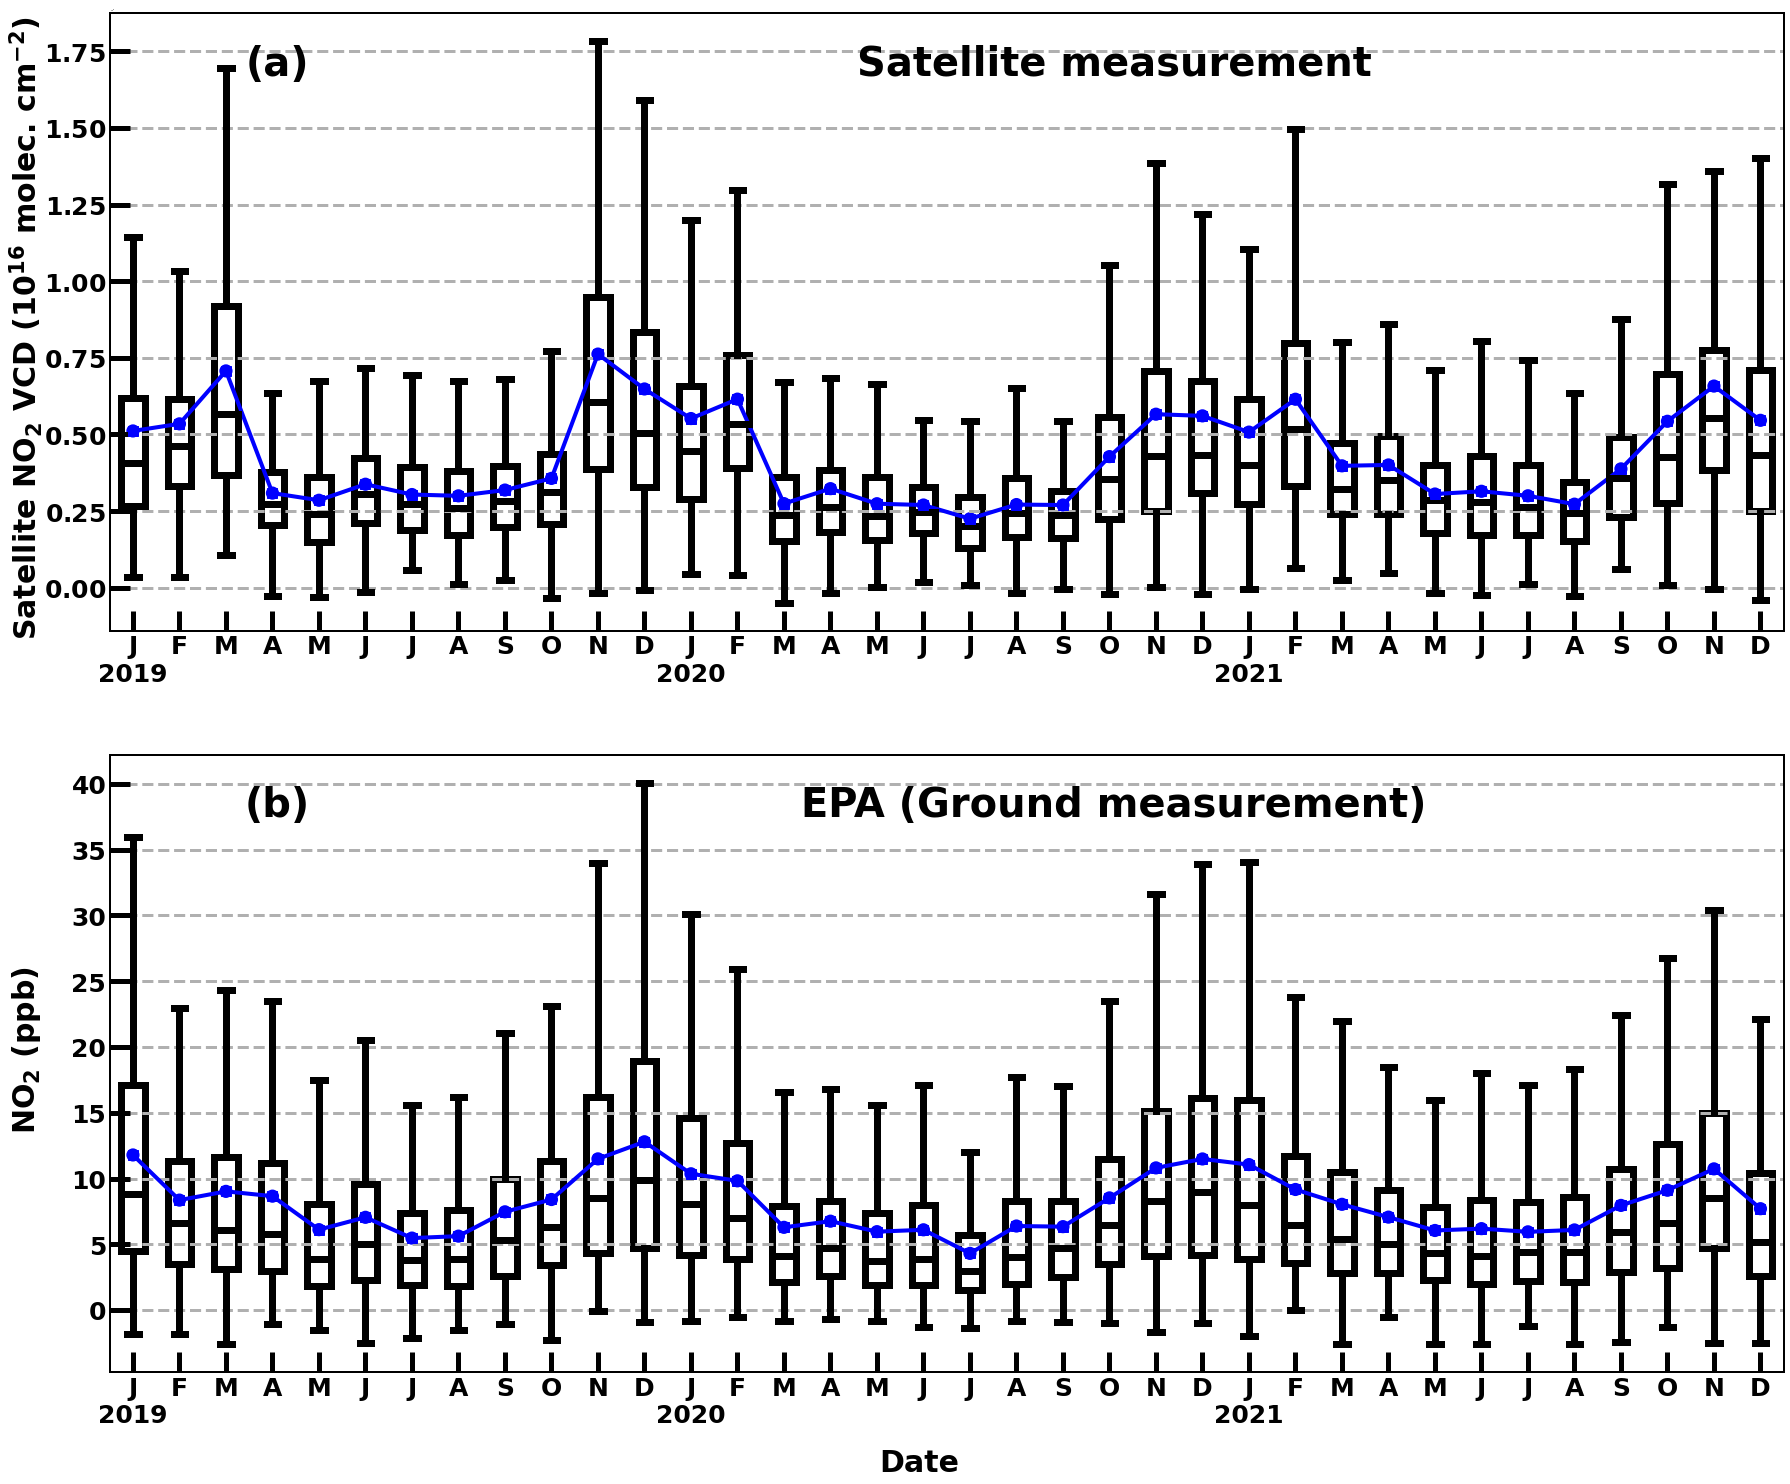

In [25]:
%%time

fig, axes = plt.subplots(2, 1, figsize=(30, 25))

# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# PLOT FOR TROPOMI HOUSTON ------------------------------------------------------------------------------------------

ax1 = plt.subplot(2, 1, 1) 
sns.boxplot(x = 'Date1', y = 'ColumnAmountNO2Trop', width=.5,linewidth = 7.,\
                    data = df, showmeans=True, saturation = 1, palette=['black'],showfliers = False, fliersize=0,\
                 meanprops={"marker":"s","markerfacecolor":"blue", "markeredgecolor":"blue", 'markersize':10}, ax = ax1)

sns.pointplot(data=df, x='Date1', y= 'ColumnAmountNO2Trop', ci=None,
  dodge=.8 - .8 / 3, scale=1.5, color='blue', marker='D')

ax1.set_xlabel('')
ax1.set_ylabel('')

box_patches = [patch for patch in ax1.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax1.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax1.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

plt.xticks(ax1.get_xticks(), Mothly_Xlabels, fontsize =20)
ax1.tick_params(axis ='y', labelcolor = 'black', labelsize = 25) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 25) 
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))


ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)

# for ax1 
ax1.tick_params(which='both', width=5)
ax1.tick_params(which='major', length=20)
ax1.tick_params(which='minor', length=15)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, axis = 'y', which = 'major', alpha = 1, linestyle='--', linewidth = 3)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,0)) 
ax1.yaxis.set_major_formatter(formatter)
ax1.ticklabel_format(style='scientific', axis = 'y') 
t = ax1.yaxis.get_offset_text()
t.set_size(0)

ax1.text(0.6, 0.9, 'Satellite measurement', horizontalalignment='center',transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')

# ax1.text(0.5, 0., 'Date', ha='center', va='center', fontsize = 30) 'meters $\mathregular{10^{-1}}$'
ax1.text(-0.05, 0., 'Satellite NO$_2$ VCD ($10^{16}$ molec. $\mathregular{cm^{-2}}$)', \
          horizontalalignment='center',transform=ax1.transAxes, fontsize = 30, fontweight="bold", rotation = 'vertical')


ax1.text(0.1, 0.9, '(a)', horizontalalignment='center',transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')

# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# PLOT FOR EPA NO2 HOUSTON ------------------------------------------------------------------------------------------
ax1 = plt.subplot(2, 1, 2) 
sns.boxplot(x = 'Date1', y = 'No2', width=.5,linewidth = 7.,\
                    data = df_no2, showmeans=True, palette=['black'],showfliers = False, fliersize=0, saturation = 1,\
                 meanprops={"marker":"s","markerfacecolor":"blue", "markeredgecolor":"blue", 'markersize':10}, ax = ax1)

sns.pointplot(data=df_no2, x='Date1', y= 'No2', ci=None,
  dodge=.8 - .8 / 3, scale=1.5, color='blue', marker='D')

ax1.set_xlabel('')
ax1.set_ylabel('')

box_patches = [patch for patch in ax1.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax1.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax1.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')


plt.xticks(ax1.get_xticks(), Mothly_Xlabels, fontsize =20)
ax1.tick_params(axis ='y', labelcolor = 'black', labelsize = 25) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 25) 
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))



ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)

# for ax1 
ax1.tick_params(which='both', width=5)
ax1.tick_params(which='major', length=20)
ax1.tick_params(which='minor', length=15)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, axis = 'y', which = 'major', alpha = 1, linestyle='--', linewidth = 3)

# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True) 
# formatter.set_powerlimits((-1,0)) 
# ax1.yaxis.set_major_formatter(formatter)
# ax1.ticklabel_format(style='scientific', axis = 'y') 
# t = ax1.yaxis.get_offset_text()
# t.set_size(40)

ax1.text(0.1, 0.9, '(b)', horizontalalignment='center',transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')
ax1.text(0.6, 0.9, 'EPA (Ground measurement)', horizontalalignment='center',transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')
ax1.text(-0.05, 0.4, 'NO$_2$ (ppb)', \
          horizontalalignment='center',transform=ax1.transAxes, fontsize = 30, fontweight="bold", rotation = 'vertical')


# COMMON SETTING
plt.subplots_adjust(wspace= 0, hspace = 0.2)
fig.text(0.5, 0.075, 'Date', ha='center', va='center', fontsize = 30)

fig.savefig("EpaTropOmi_Houston_Boxplot.jpg", dpi = 500, bbox_inches='tight')